<a href="https://colab.research.google.com/github/ahmetcanerdem/Bil470Proje/blob/master/Network%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install -q kaggle
import tensorflow as tf
from google.colab import files

In [5]:
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    4GB  2020-07-17 15:05:34          89664  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          15967  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37             98  
navinmundhra/daily-power-generation-in-india-20172020         Daily Power Generation in India (2017-2020)          63KB  2020-06-29 17:13:29           1147  
mrmorj/data-police

In [6]:
!kaggle competitions download -c siim-isic-melanoma-classification

  0% 0.00/1.05M [00:00<?, ?B/s]
100% 1.05M/1.05M [00:00<00:00, 72.7MB/s]
  0% 0.00/1.82M [00:00<?, ?B/s]
100% 1.82M/1.82M [00:00<00:00, 118MB/s]
  0% 0.00/1.07M [00:00<?, ?B/s]
100% 1.07M/1.07M [00:00<00:00, 72.0MB/s]
  0% 0.00/0.99M [00:00<?, ?B/s]
100% 0.99M/0.99M [00:00<00:00, 66.9MB/s]
  0% 0.00/195k [00:00<?, ?B/s]
100% 195k/195k [00:00<00:00, 62.0MB/s]
  0% 0.00/208k [00:00<?, ?B/s]
100% 208k/208k [00:00<00:00, 66.1MB/s]
  0% 0.00/671k [00:00<?, ?B/s]
100% 671k/671k [00:00<00:00, 89.9MB/s]
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 123MB/s]
  0% 0.00/217k [00:00<?, ?B/s]
100% 217k/217k [00:00<00:00, 71.3MB/s]
  0% 0.00/675k [00:00<?, ?B/s]
100% 675k/675k [00:00<00:00, 93.8MB/s]
  0% 0.00/1.52M [00:00<?, ?B/s]
100% 1.52M/1.52M [00:00<00:00, 103MB/s]
  0% 0.00/1.54M [00:00<?, ?B/s]
100% 1.54M/1.54M [00:00<00:00, 105MB/s]
  0% 0.00/1.35M [00:00<?, ?B/s]
100% 1.35M/1.35M [00:00<00:00, 91.8MB/s]
  0% 0.00/346k [00:00<?, ?B/s]
100% 346k/346k [00:00<00:00, 105MB/s]
  0%

In [8]:
! mkdir train
! unzip ISIC_0015719.dcm.zip -d train



mkdir: cannot create directory ‘train’: File exists
Archive:  ISIC_0015719.dcm.zip
  inflating: train/ISIC_0015719.dcm  


In [16]:
!pip install pydicom
import pydicom as dicom
import matplotlib.pyplot as plt

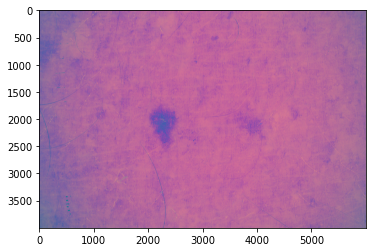

In [17]:
image_path = './train/ISIC_0015719.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)